# Example of the `aitlas` toolbox in the context of object detection in remote sensing images


## Import the required packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionPascalDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 10943


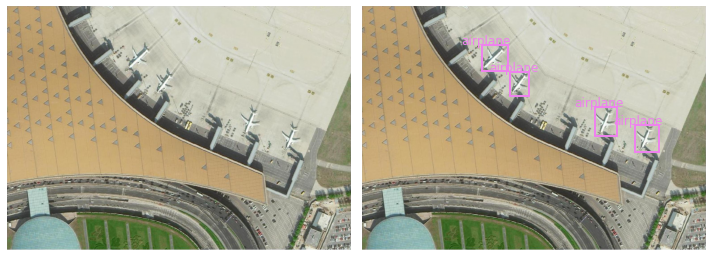

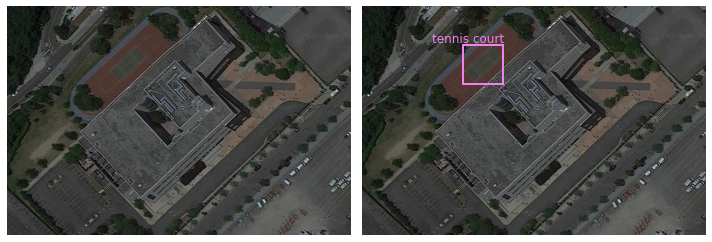

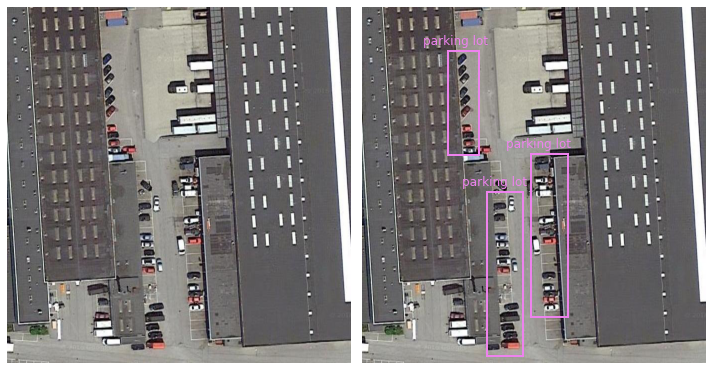

In [3]:
dataset_config = {
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/test.txt"
}
dataset = ObjectDetectionPascalDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(5);
dataset.show_image(800);
dataset.show_image(2458);

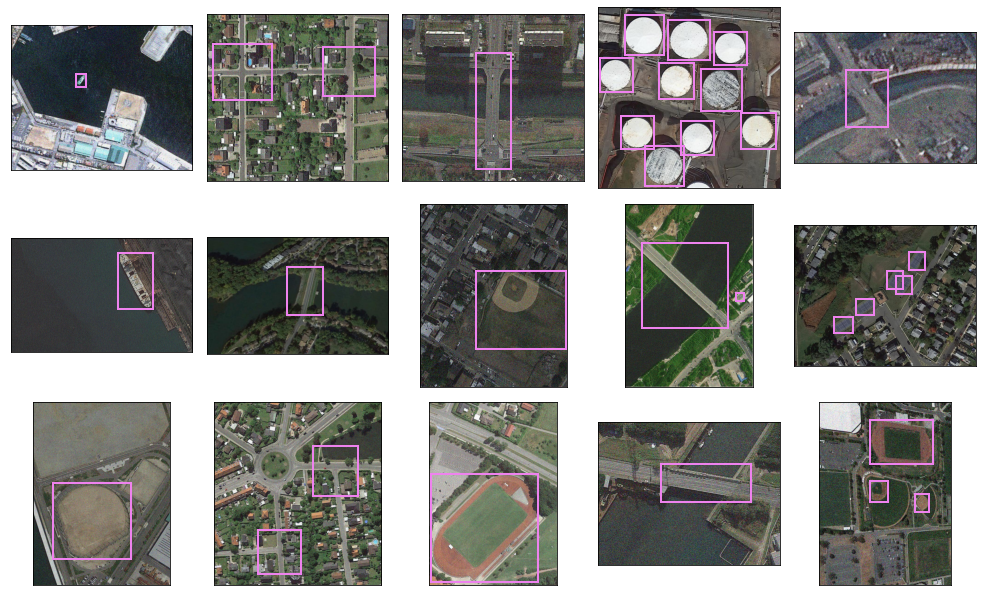

In [8]:
dataset.show_batch(15);

In [4]:
dataset.data_distribution_table()

,Label,Count
0,T junction,2475
1,airplane,2452
2,baseball diamond,2032
3,basketball court,2249
4,bridge,2408
5,crossroad,2659
6,ground track field,2281
7,harbor,1985
8,parking lot,2480
9,ship,2078


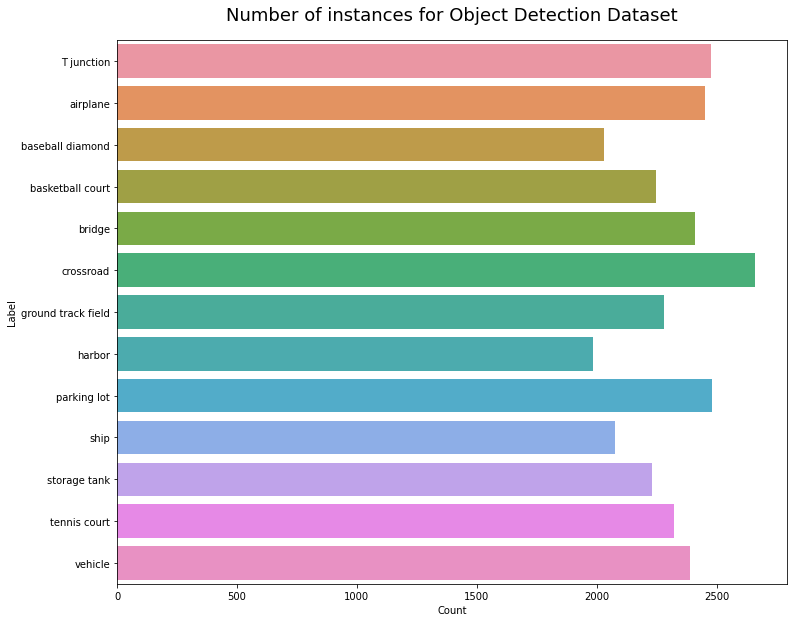

In [5]:
dataset.data_distribution_barchart();

## Load train data

In [9]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/train.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionPascalDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/val.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
validation_dataset = ObjectDetectionPascalDataset(validation_dataset_config)

print(f"Total number of train images: {len(train_dataset)}, Total number of validation images: {len(validation_dataset)}")

Total number of train images: 5401, Total number of validation images: 5417


## Create the model

In [10]:
epochs = 20
model_directory = "./experiments/hrrsd"
model_config = {
    "num_classes": 14,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [ ]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

## Evalute the model using test data

In [ ]:
test_dataset_config = {
    "shuffle": False,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/test.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]

}

test_dataset = ObjectDetectionPascalDataset(test_dataset_config)
print(f"Total number of test images: {len(test_dataset)}")

model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

## Predictions

2022-12-07 12:18:11,535 INFO Loading checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar
2022-12-07 12:18:11,832 INFO Loaded checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar at epoch 18


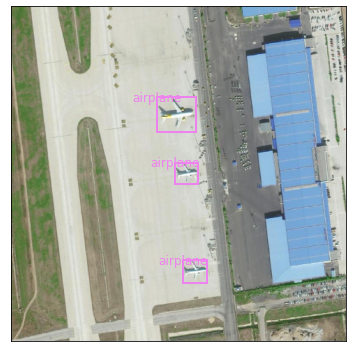

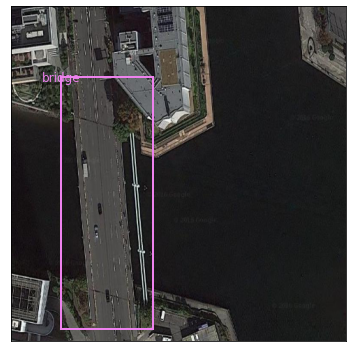

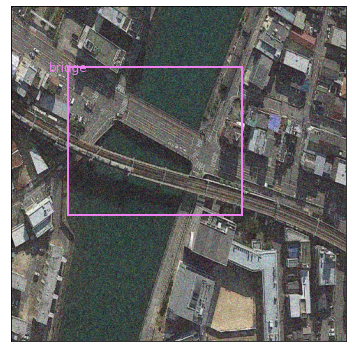

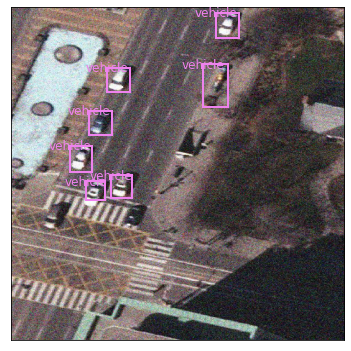

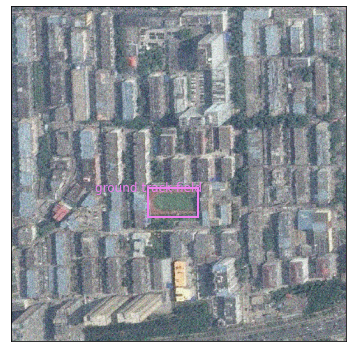

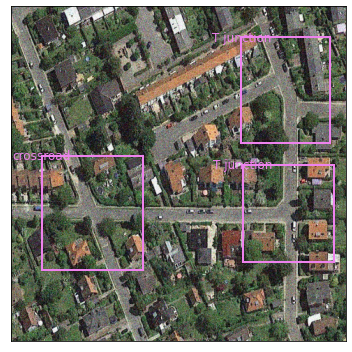

In [7]:
model_config = {
    "num_classes": 14,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar"
labels = [None,
         'T junction',
         'airplane',
         'baseball diamond',
         'basketball court',
         'bridge',
         'crossroad',
         'ground track field',
         'harbor',
         'parking lot',
         'ship',
         'storage tank',
         'tennis court',
         'vehicle']
transform = Resize()
model.load_model(model_path)

image = image_loader('../data/HRRSD/JPEGImages/00042.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/00620.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/19739.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/20979.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/10063.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/09536.jpg')
fig = model.detect_objects(image, labels, transform)